In [34]:
# csv dosyasını oku
# tarih sutununu datetime verisine çevir ve index kolonu haline getir

import pandas as pd
df = pd.read_csv("monthly-mean-temp.csv",parse_dates=["Month"],index_col="Month").asfreq("MS")
df

,Temperature
Month,
1920-01-01,40.6
1920-02-01,40.8
1920-03-01,44.4
1920-04-01,46.7
1920-05-01,54.1
...,...
1939-08-01,61.8
1939-09-01,58.2
1939-10-01,46.7


In [35]:
# eksik veri kontrolü

df.isnull().sum()

Temperature    0
dtype: int64

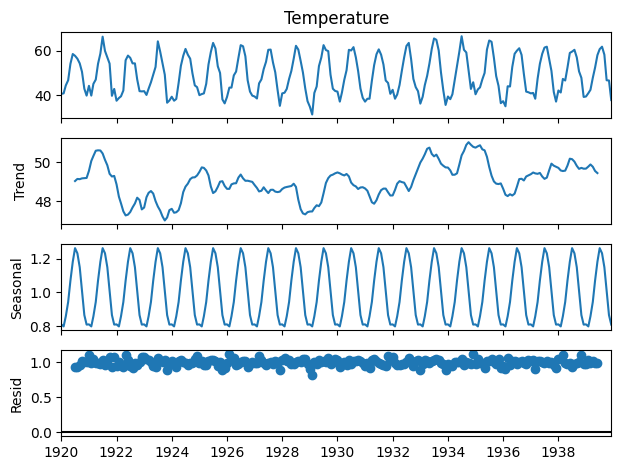

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec_df = seasonal_decompose(df["Temperature"], model="mul", period=12)
dec_plot = dec_df.plot()

In [37]:
# durağan testi p_value 0.05 den büyükse durağan değildir

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df["Temperature"])
#print(adf_test)
p_value = adf_test[1]
print(p_value)

0.016989030222608687


In [ ]:
# acf grafiğine bak eğer acf grafiğinde aşağı doğru bir kuyruk varsa AR modeline uygundur 
# pacf grafiğine bak eğer pacf grafiğinde ani azalış-ani kesilme varsa AR modeline uygundur
# p parametresi de pacf grafiğine bakarak seçilir. 0.cı çubuktan sonra kaç tane anlamlı çubuk varsa katsayı o kadar olur.

# acf grafiğine bak eğer acf grafiğinde ani azalış-ani kesilme varsa MA modeline uygundur
# pacf grafiğine bak eğer pacf grafiğinde aşağı doğru bir kuyruk varsa MA modeline uygundur
# q parametresi de acf grafiğine bakarak seçilir. 0.cı çubuktan sonra kaç tane anlamlı çubuk varsa katsayı o kadar olur.

# Bir zaman serisinin ARMA modele uygun olup olmadigini anlamak icin ACF ve PACF grafiklerine bakmak gerekir. Eger hem ACF grafiginde hem de PACF grafiginde kuyruk var ise ARMA modeli tercih edilir. ARMA modelinin q parametresi PACF grafigine bakilarak, p parametresi ise ACF grafiginde bakilarak secilir


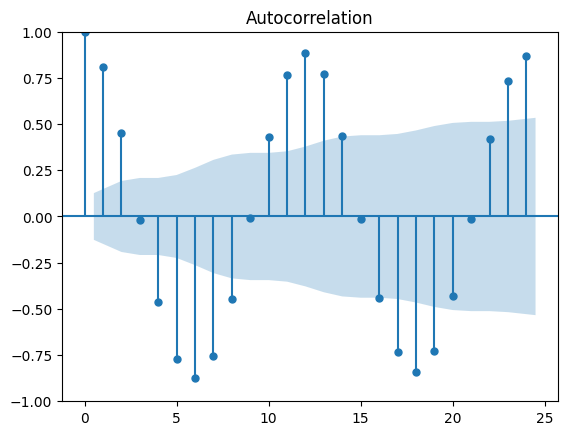

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plot_acf(df["Temperature"], lags=24)

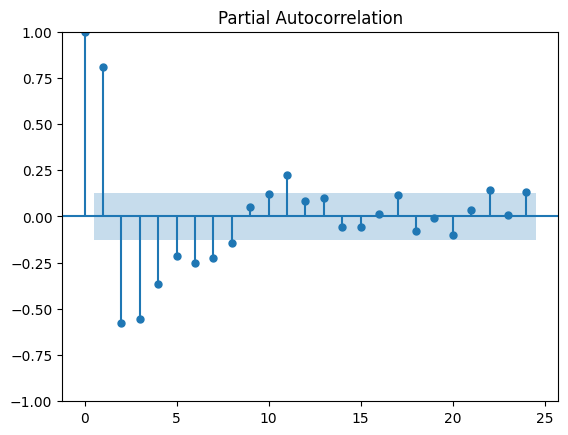

In [39]:
fig = plot_pacf(df["Temperature"], lags=24)

In [40]:
train, test = df[:-24], df[-24:]

In [8]:
# otomatik olarak hiperparametre bul

import pmdarima as pm
model = pm.auto_arima(train["Temperature"],
                      seasonal=True, m=12,                     
                 	  max_p=3, max_q=3,
                    max_P=3, max_Q=3,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)
# Print model summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1129.287, Time=1.25 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1548.215, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1153.866, Time=0.72 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1315.135, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2302.451, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1051.324, Time=1.09 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1052.276, Time=0.54 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=1031.004, Time=2.37 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=1110.717, Time=2.80 sec
 ARIMA(2,0,2)(0,0,3)[12] intercept   : AIC=1043.683, Time=5.57 sec
 ARIMA(2,0,2)(1,0,3)[12] intercept   : AIC=1100.426, Time=5.75 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=1171.534, Time=1.20 sec
 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=1095.834, Time=1.92 sec
 ARIMA(3,0,2)(0,0,2)[12] intercept   : AIC=1091.360, Time=2.69 sec
 ARIMA(2,0,3)(0,0,2

In [9]:
# Print model summary
print(model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  216
Model:             SARIMAX(2, 0, 3)x(0, 0, [1, 2], 12)   Log Likelihood                -502.744
Date:                                 Sat, 13 Jan 2024   AIC                           1023.488
Time:                                         16:21:16   BIC                           1053.866
Sample:                                     01-01-1920   HQIC                          1035.761
                                          - 12-01-1937                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.9172      0.193     66.946      0.000      12.539      13

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train["Temperature"], order=(2,0,3), seasonal_order=(0,0,2,12), trend="c")

# Modeli eğit              
model_fit = model.fit()

# Tahminleri yap
fitted = model_fit.predict()

# hata payını al
resids = model_fit.resid

# tahminleri train içine ekleyin

train["fitted"] = fitted


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_re

In [42]:
print(model_fit.summary())

                                        SARIMAX Results                                        
Dep. Variable:                             Temperature   No. Observations:                  216
Model:             SARIMAX(2, 0, 3)x(0, 0, [1, 2], 12)   Log Likelihood                -502.744
Date:                                 Sat, 13 Jan 2024   AIC                           1023.488
Time:                                         17:46:12   BIC                           1053.866
Sample:                                     01-01-1920   HQIC                          1035.761
                                          - 12-01-1937                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.9172      0.193     66.946      0.000      12.539      13

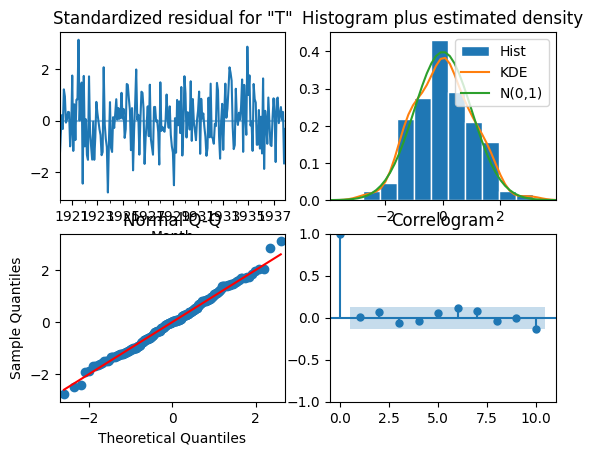

In [43]:
diags = model_fit.plot_diagnostics()

<Axes: xlabel='Month'>

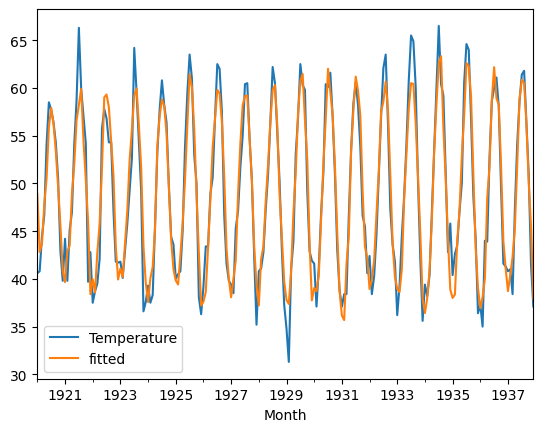

In [44]:
train.plot()

test verisi için

In [45]:
# test verilerinin tahminini yap

test_predicted = model_fit.forecast(steps=len(test))

C:\Users\user\AppData\Local\Temp\ipykernel_4312\3554605576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["fittedd"] = test_predicted


<Axes: xlabel='Month'>

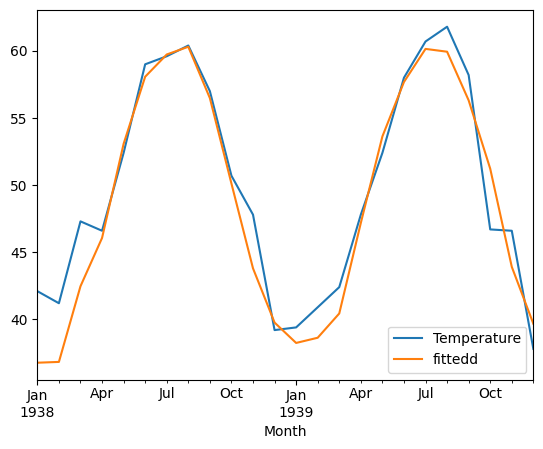

In [46]:
test["fittedd"] = test_predicted

test.plot()

train ile test verilerini karşılaştır ve overfit kontrolü yap

In [47]:
# train verisi için; 
import numpy as np
print("---train verisi---")
mae = np.mean(np.abs(resids.values))
mse = np.mean(np.square(resids.values))
rmse = np.sqrt(np.mean(np.square(resids.values)))
print(mae)
print(mse)
print(rmse)
print()
# test verisi için;
print("---test verisi---")
mae = np.mean(np.abs(test["Temperature"]-test_predicted))
mse = np.mean(np.square(test["Temperature"]-test_predicted))
rmse = np.sqrt(np.mean(np.square(test["Temperature"]-test_predicted)))
print(mae)
print(mse)
print(rmse)

---train verisi---
1.9874803954152664
6.3630763199252005
2.522513888945946

---test verisi---
1.8121605552626647
5.845042144499974
2.4176521967603146


geleceğe yönelik tahmin

In [50]:
# verinin tümünü kullanarak tekrardan fit et
model = SARIMAX(df["Temperature"], order=(2,0,3), seasonal_order=(0,0,2,12), trend="n")
forecasts = model_fit.get_forecast(steps=10)
tahmin_değerleri = forecasts.predicted_mean
tahmin_değerleri.head(10)

1938-01-01    36.769036
1938-02-01    36.829525
1938-03-01    42.465539
1938-04-01    46.061479
1938-05-01    53.074431
1938-06-01    58.075792
1938-07-01    59.731682
1938-08-01    60.306641
1938-09-01    56.481952
1938-10-01    50.119919
Freq: MS, Name: predicted_mean, dtype: float64